In [1]:
import pandas as pd
import numpy as np

Figure 2

# Data Loading

In [2]:
# inventor_table = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/raw/patentsview/g_inventor_disambiguated.tsv', on_bad_lines= 'skip', sep ='\t')
# assignee_table = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/raw/patentsview/g_assignee_disambiguated.tsv', on_bad_lines= 'skip', sep ='\t')

In [3]:
disruptive_tasks = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/processed/disruptive_tasks.csv', on_bad_lines= 'skip')
consolidating_tasks = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/processed/consolidating_tasks.csv', on_bad_lines= 'skip')


In [5]:
disruptive_tasks['patent_id'] = disruptive_tasks['patent_id'].astype(str)

In [6]:
consolidating_tasks['patent_id'] = consolidating_tasks['patent_id'].astype(str)

In [7]:
# location_table = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/raw/patentsview/g_location_disambiguated.tsv', on_bad_lines = 'skip', sep = '\t')

In [8]:
tasks = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/processed/tasks_matched_with_ai_patent_keywords_alicpc.csv')
quantile_threshold = tasks['patents_cosine_similarity'].quantile(0.9)
tasks_notexposedai = tasks[tasks['patents_cosine_similarity']<quantile_threshold]
tasks_exposedai = tasks[tasks['patents_cosine_similarity']>quantile_threshold]

In [9]:
tasks_exposedai['patent_id'] =tasks_exposedai['patent_id'].astype(str)

/tmp/ipykernel_24939/2269441982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasks_exposedai['patent_id'] =tasks_exposedai['patent_id'].astype(str)


In [10]:
# tasks_merge= pd.merge(tasks_exposedai,assignee_table, on ='patent_id',how='left' )


In [11]:
occupations = pd.read_csv('/data/sg/munjkim/USPTO/nokia_intern/data/raw/ONET_ALI/db_24_3_text/Occupation Level Metadata.txt', sep='\t')

In [30]:
occupations_naics_sector = occupations[occupations['Item'] == 'NAICS Sector']
occupations_naics_sector['SOC Code'] = occupations_naics_sector['O*NET-SOC Code'].apply(lambda x: x[:7])
occupations_naics_sector_trust = occupations_naics_sector[occupations_naics_sector['Percent']>60]
occupations_naics_sector_trust_max = occupations_naics_sector_trust.loc[occupations_naics_sector_trust.groupby('SOC Code')['Percent'].idxmax()]

/tmp/ipykernel_24939/2788158732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupations_naics_sector['SOC Code'] = occupations_naics_sector['O*NET-SOC Code'].apply(lambda x: x[:7])


In [31]:
soc_code_to_response = dict(zip(occupations_naics_sector_trust_max ['SOC Code'], occupations_naics_sector_trust_max ['Response']))



In [32]:
disruptive_tasks['SOC Code'] = disruptive_tasks['O*NET-SOC Code'].apply(lambda x: x[:7])
consolidating_tasks['SOC Code'] = consolidating_tasks['O*NET-SOC Code'].apply(lambda x: x[:7])

In [33]:
tasks_exposedai['SOC Code'] = tasks_exposedai['O*NET-SOC Code'].apply(lambda x: x[:7])

/tmp/ipykernel_24939/336808364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasks_exposedai['SOC Code'] = tasks_exposedai['O*NET-SOC Code'].apply(lambda x: x[:7])


In [34]:
disruptive_tasks['task_industry'] = disruptive_tasks['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)

In [35]:
consolidating_tasks['task_industry'] = consolidating_tasks['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)

In [36]:
tasks_exposedai['task_industry'] = tasks_exposedai['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)

/tmp/ipykernel_24939/3228592285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasks_exposedai['task_industry'] = tasks_exposedai['SOC Code'].apply(lambda x: soc_code_to_response[x] if x in soc_code_to_response else np.nan)


In [37]:
# disruptive_merged_df = pd.merge(disruptive_tasks, assignee_table, on='patent_id', how='left')
# consolidating_merged_df = pd.merge(consolidating_tasks, assignee_table, on='patent_id', how='left')

In [38]:
# disruptive_grouped_data = disruptive_merged_df  .groupby(['task_industry','disambig_assignee_organization']).size().reset_index(name='patents')
# consolidating_grouped_data = consolidating_merged_df.groupby([ 'task_industry','disambig_assignee_organization']).size().reset_index(name='patents')


In [39]:
industry_proportions = tasks_exposedai['task_industry'].value_counts(normalize=True)

industry_counts_disruptive = disruptive_tasks['task_industry'].value_counts(normalize=True)
industry_counts_consolidating = consolidating_tasks['task_industry'].value_counts(normalize=True)


In [40]:
industry_proportions

task_industry
Manufacturing                                                               0.307692
Health care and social assistance                                           0.256410
Transportation and warehousing                                              0.073815
Professional, Scientific and Technical Services                             0.070707
Public administration                                                       0.045066
Construction                                                                0.041181
Utilities                                                                   0.034188
Retail trade                                                                0.031857
Education services                                                          0.029526
Information                                                                 0.021756
Agriculture, forestry, fishing and hunting                                  0.017871
Other services, except public administration       

In [41]:
industry_counts_disruptive

task_industry
Health care and social assistance                                           0.259843
Manufacturing                                                               0.251969
Professional, Scientific and Technical Services                             0.098425
Transportation and warehousing                                              0.074803
Information                                                                 0.047244
Public administration                                                       0.043307
Construction                                                                0.043307
Utilities                                                                   0.039370
Education services                                                          0.035433
Retail trade                                                                0.031496
Administrative and support and waste management and remediation services    0.027559
Finance and insurance                              

In [43]:
(industry_counts_disruptive - industry_proportions).sort_values()

task_industry
Manufacturing                                                              -0.055724
Agriculture, forestry, fishing and hunting                                 -0.013934
Mining                                                                     -0.006941
Other services, except public administration                               -0.006060
Arts, entertainment, and recreation                                        -0.004558
Accommodation and food services                                            -0.003833
Public administration                                                      -0.001759
Retail trade                                                               -0.000361
Transportation and warehousing                                              0.000988
Construction                                                                0.002126
Health care and social assistance                                           0.003432
Utilities                                          

In [23]:
# Calculate the difference
difference_disruptive = industry_counts_disruptive - industry_proportions

# Rank the difference by sorting the values
ranked_difference = difference_disruptive.sort_values(ascending=False)

# Display the ranked difference
print(ranked_difference)

task_industry
Information                                                                 0.021564
Professional, Scientific and Technical Services                             0.017089
Administrative and support and waste management and remediation services    0.013927
Education services                                                          0.011016
Transportation and warehousing                                              0.008670
Finance and insurance                                                       0.006250
Utilities                                                                   0.005409
Public administration                                                       0.005213
Construction                                                                0.002538
Wholesale trade                                                            -0.000020
Retail trade                                                               -0.000880
Health care and social assistance                  

In [25]:
# Raw counts
counts_all = tasks_exposedai['task_industry'].value_counts()
counts_disruptive = disruptive_tasks['task_industry'].value_counts()

# Total sample sizes
n_all = len(tasks_exposedai)
n_disruptive = len(disruptive_tasks)


from statsmodels.stats.proportion import proportions_ztest

results = []

for industry in counts_all.index:
    count1 = counts_disruptive.get(industry, 0)       # tasks in this industry (disruptive)
    count2 = counts_all[industry]                     # tasks in this industry (all AI)
    
    n1 = n_disruptive
    n2 = n_all

    stat, pval = proportions_ztest([count1, count2], [n1, n2])
    
    results.append({
        'industry': industry,
        'prop_disruptive': count1 / n1,
        'prop_all': count2 / n2,
        'prop_difference': count1 / n1 - count2 / n2,
        'z_stat': stat,
        'p_value': pval
    })




In [26]:
ztest_results_df = pd.DataFrame(results)
ztest_results_df = ztest_results_df.sort_values(by='prop_difference')

In [27]:
ztest_results_df

,industry,prop_disruptive,prop_all,prop_difference,z_stat,p_value
0,Manufacturing,0.168766,0.210769,-0.042003,-1.894244,0.058193
11,"Agriculture, forestry, fishing and hunting",0.002519,0.013333,-0.010814,-1.841821,0.065501
13,Accommodation and food services,0.005038,0.010256,-0.005219,-0.983564,0.325330
15,Mining,0.002519,0.007179,-0.004661,-1.062186,0.288151
12,"Arts, entertainment, and recreation",0.007557,0.010769,-0.003213,-0.579949,0.561949
1,Health care and social assistance,0.166247,0.169231,-0.002984,-0.144704,0.884945
9,"Other services, except public administration",0.015113,0.016923,-0.001810,-0.257118,0.797088
7,Retail trade,0.022670,0.023590,-0.000920,-0.110417,0.912079
17,Wholesale trade,0.002519,0.002564,-0.000045,-0.016261,0.987027
5,Construction,0.035264,0.033846,0.001418,0.141963,0.887109


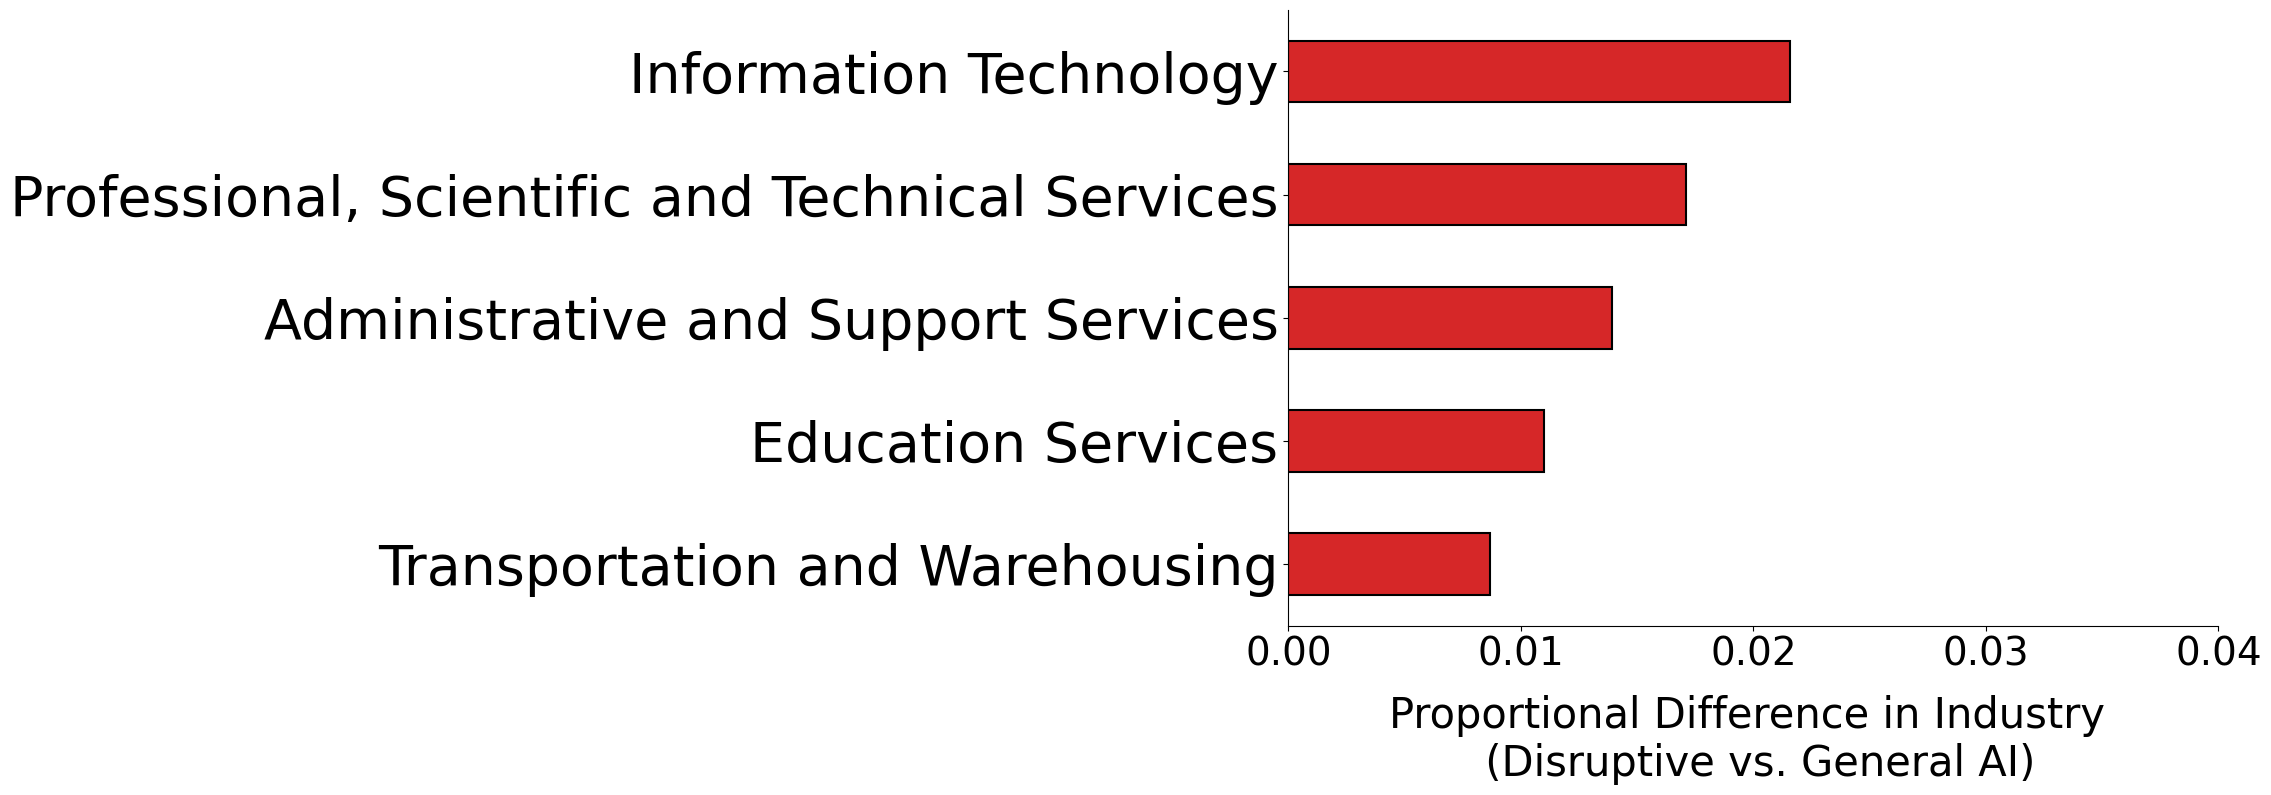

In [27]:
import matplotlib.pyplot as plt

# Set the style to a more professional one
plt.style.use('default')

# Define a color in a fancy red scheme
fancy_red = '#D62728'  # This is a deep red color that is often used in high-quality visualizations

# Create the figure and axis
plt.figure(figsize=(12, 8))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Plot the data
ranked_difference[:5].sort_values(ascending=True).plot(kind='barh', color=fancy_red, edgecolor='black', linewidth=1.5)

# Add labels and titles with larger font sizes
plt.xlabel('Proportional Difference in Industry \n (Disruptive vs. General AI)', fontsize=30, labelpad=15)
plt.xticks([0, 0.01, 0.02, 0.03, 0.04], fontsize=28)
plt.yticks([4,3,2,1,0],['Information Technology', 'Professional, Scientific and Technical Services', 'Administrative and Support Services', 'Education Services','Transportation and Warehousing'], fontsize=40)
plt.ylabel('')

# Adjust the layout and font for the title
# plt.title('Top 5 Industries with the Highest Proportional Increase in Tasks Impacted by Disruptive AI Compared to General AI', fontsize=24, pad=20)

# Save the figure with a higher DPI for better quality
# plt.savefig('Top5_Disruptive_Industry_Tasks.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [30]:
# Calculate the difference
difference_consolidating = industry_counts_consolidating - industry_proportions

# Rank the difference by sorting the values
ranked_difference = difference_consolidating.sort_values(ascending=False)

# Display the ranked difference
print(ranked_difference)

task_industry
Manufacturing                                                               0.040297
Construction                                                                0.020894
Mining                                                                      0.009385
Agriculture, forestry, fishing and hunting                                  0.005754
Retail trade                                                                0.003709
Information                                                                 0.003645
Wholesale trade                                                             0.001292
Other services, except public administration                               -0.001572
Accommodation and food services                                            -0.002045
Finance and insurance                                                      -0.002928
Transportation and warehousing                                             -0.003131
Utilities                                          

In [34]:
# Raw counts
counts_all = tasks_exposedai['task_industry'].value_counts()
counts_consolidating = consolidating_tasks['task_industry'].value_counts()

# Total sample sizes
n_all = len(tasks_exposedai)
n_consolidating = len(consolidating_tasks)


from statsmodels.stats.proportion import proportions_ztest

results = []

for industry in counts_all.index:
    count1 = counts_consolidating.get(industry, 0)       # tasks in this industry (disruptive)
    count2 = counts_all[industry]                     # tasks in this industry (all AI)
    
    n1 = n_consolidating
    n2 = n_all

    stat, pval = proportions_ztest([count1, count2], [n1, n2])
    
    results.append({
        'industry': industry,
        'prop_consolidating': count1 / n1,
        'prop_all': count2 / n2,
        'prop_difference': count1 / n1 - count2 / n2,
        'z_stat': stat,
        'p_value': pval
    })




In [35]:
ztest_results_df = pd.DataFrame(results)
ztest_results_df = ztest_results_df.sort_values(by='prop_difference')

In [36]:
ztest_results_df

,industry,prop_consolidating,prop_all,prop_difference,z_stat,p_value
12,"Arts, entertainment, and recreation",0.001866,0.010769,-0.008904,-1.949316,0.051258
8,Education services,0.014925,0.022564,-0.007639,-1.094484,0.273743
1,Health care and social assistance,0.162313,0.169231,-0.006917,-0.379613,0.704233
4,Public administration,0.042910,0.049744,-0.006833,-0.653691,0.513311
14,Administrative and support and waste managemen...,0.003731,0.007692,-0.003961,-0.985522,0.324368
16,Finance and insurance,0.003731,0.005641,-0.001910,-0.542910,0.587192
6,Utilities,0.022388,0.024103,-0.001715,-0.230955,0.817350
13,Accommodation and food services,0.009328,0.010256,-0.000928,-0.190720,0.848745
3,"Professional, Scientific and Technical Services",0.050373,0.051282,-0.000909,-0.084646,0.932542
9,"Other services, except public administration",0.016791,0.016923,-0.000132,-0.021007,0.983240


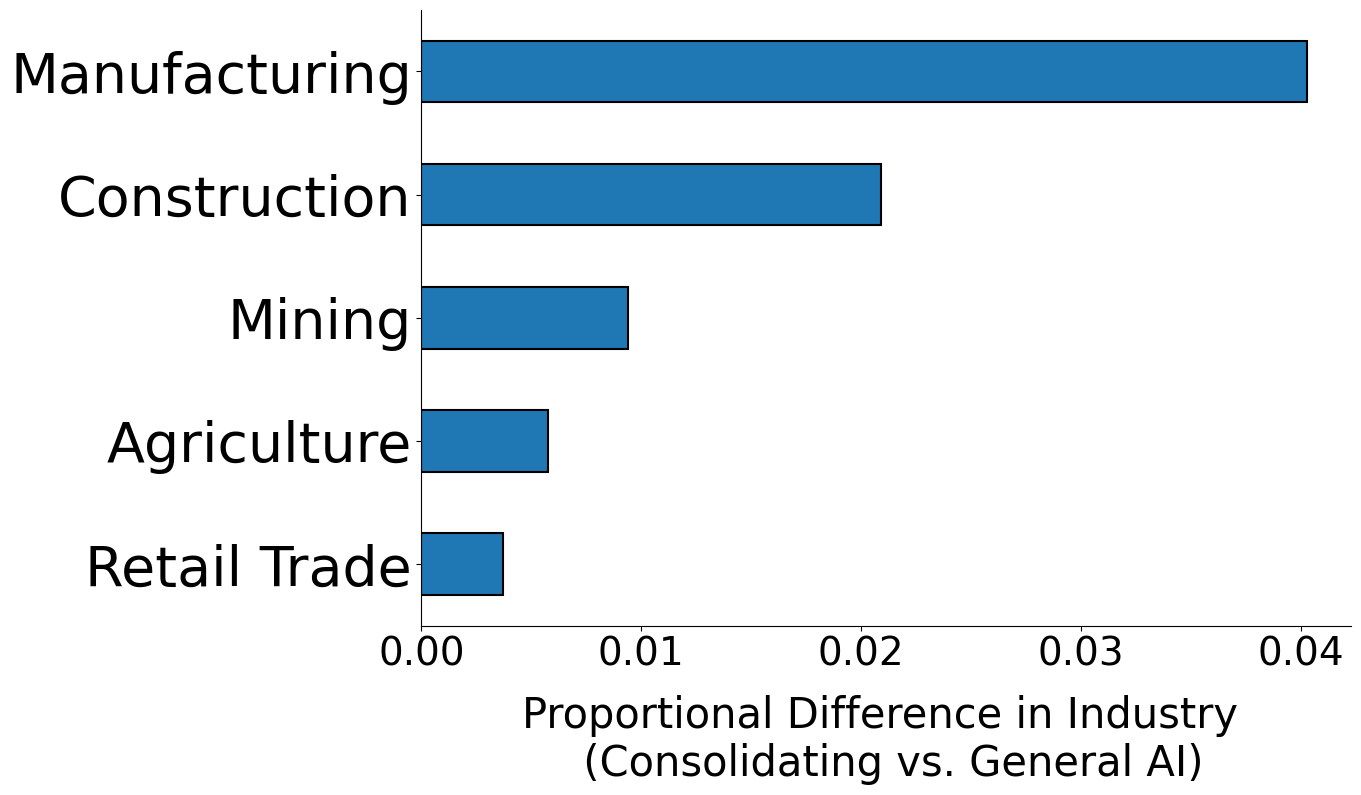

In [64]:
import matplotlib.pyplot as plt

# Set the style to a more professional one
plt.style.use('default')


['Manufacturing',
'Construction',                                                           
'Mining',                                                 
'Agriculture, forestry, fishing and hunting',
'Retail Trade' ]


# Create the figure and axis
plt.figure(figsize=(12, 8))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Plot the data
ranked_difference[:5].sort_values(ascending=True).plot(kind='barh', color='#1f77b4', edgecolor='black', linewidth=1.5)

# Add labels and titles with larger font sizes
plt.xlabel('Proportional Difference in Industry \n (Consolidating vs. General AI)', fontsize=30, labelpad=15)
plt.xticks([0, 0.01, 0.02, 0.03, 0.04], fontsize=28)
plt.yticks([4,3,2,1,0],['Manufacturing',
'Construction',                                                           
'Mining',                                                 
'Agriculture',
'Retail Trade' ], fontsize=40)
plt.ylabel('')

# Adjust the layout and font for the title
# plt.title('Top 5 Industries with the Highest Proportional Increase in Tasks Impacted by Disruptive AI Compared to General AI', fontsize=24, pad=20)

# Save the figure with a higher DPI for better quality
# plt.savefig('Top5_Consolidating_Industry_Tasks.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


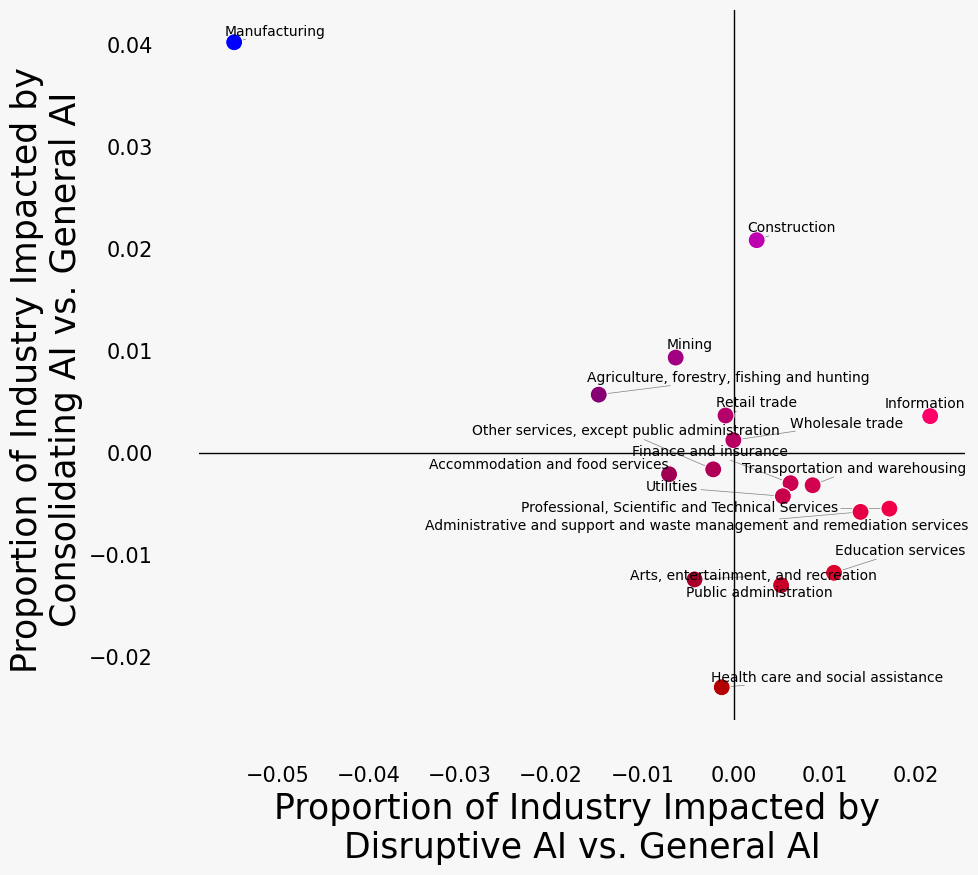

In [89]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors



mpl.rcParams.update({
    'font.size': 15,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15
})

# Calculate colors based on your custom scaling
colors = []
for industry in difference_disruptive.index:
    d = difference_disruptive[industry]
    c = difference_consolidating[industry]


        # Normalize each axis separately for color mapping
    red_component = (d - min(difference_disruptive)) / (max(difference_disruptive) - min(difference_disruptive))
    blue_component = (c - min(difference_consolidating)) / (max(difference_consolidating) - min(difference_consolidating))
    colors.append((red_component, 0, blue_component))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 9))

# Create the scatter plot with larger markers and edgecolor for better contrast
scatter = ax.scatter(difference_disruptive, difference_consolidating, color=colors, s=150, edgecolor='w', linewidth=0.8, zorder=3)

# Annotate each point with its industry name
texts = []
for industry in difference_disruptive.index:
    x = difference_disruptive[industry]
    y = difference_consolidating[industry]
    texts.append(ax.text(x, y, industry, fontsize=10, ha='right', va='bottom', zorder=4))

# Adjust text to reduce overlaps
adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Add x=0 and y=0 axis lines with higher zorder so they appear on top of the canvas but below texts
ax.axhline(0, color='black', linewidth=1, zorder=2)
ax.axvline(0, color='black', linewidth=1, zorder=2)

# Set axis labels with descriptive titles and color coding
ax.set_xlabel('Proportion of Industry Impacted by \nDisruptive AI vs. General AI',fontsize=25)
ax.set_ylabel('Proportion of Industry Impacted by \n Consolidating AI vs. General AI',  fontsize=25)
# ax.set_title('Scatter Plot of Disruptive vs Consolidating Differences by Industry', fontsize=18, pad=20)

# Remove the box outline (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove tick marks for a cleaner look
ax.tick_params(top=False, right=False, left=False, bottom=False,size=30)


# Remove background gridlines
ax.grid(False)

# Optionally, add a light background color
ax.set_facecolor('#f7f7f7')
fig.patch.set_facecolor('#f7f7f7')



plt.tight_layout()
plt.savefig('../results/figures/Industry_field_difference.png')
plt.show()


Agriculture, forestry, fishing and hunting
Manufacturing
Mining
Retail trade
Wholesale trade


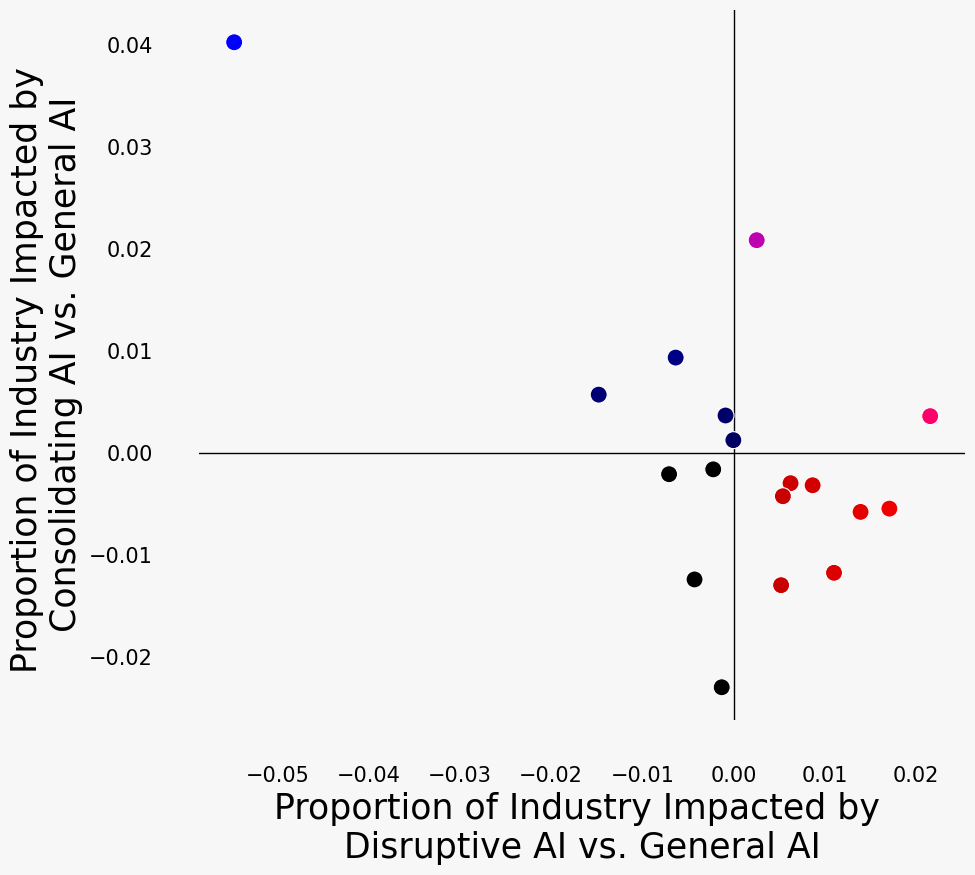

In [113]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib as mpl
import numpy as np

# Example: difference_disruptive and difference_consolidating are pandas Series.
# Replace these with your actual data.
# difference_disruptive = ...
# difference_consolidating = ...

mpl.rcParams.update({
    'font.size': 15,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15
})

# Normalize only positive values for color intensity
if (difference_disruptive > 0).any():
    pos_min_d = difference_disruptive.min()
    pos_max_d = difference_disruptive[difference_disruptive > 0].max()
else:
    pos_min_d, pos_max_d = 0, 1

if (difference_consolidating > 0).any():
    pos_min_c = difference_consolidating.min()
    pos_max_c = difference_consolidating[difference_consolidating > 0].max()
else:
    pos_min_c, pos_max_c = 0, 1

colors = []
for industry in difference_disruptive.index:
    d = difference_disruptive[industry]
    c = difference_consolidating[industry]
    
    # If both values are less than or equal to zero, set color to white.
    if d <= 0 and c <= 0:
       
        colors.append((0, 0, 0))  # white
    # If disruptive is positive and dominates (or consolidating is non-positive)
    elif d > 0 and (c <= 0 ):
        red_intensity = (d - pos_min_d) / (pos_max_d - pos_min_d) if pos_max_d > pos_min_d else 1
        colors.append((red_intensity, 0, 0))
    # If consolidating is positive and dominates (or disruptive is non-positive)
    elif c > 0 and (d <= 0 ):
        print(industry)
        blue_intensity = (c - pos_min_c) / (pos_max_c - pos_min_c) if pos_max_c > pos_min_c else 1
        colors.append((0, 0, blue_intensity))
    else:
      
        # Fallback: if conditions are ambiguous, use a mix (this case should rarely occur).
        red_intensity = (d - pos_min_d) / (pos_max_d - pos_min_d) if pos_max_d > pos_min_d else 1
        blue_intensity = (c - pos_min_c) / (pos_max_c - pos_min_c) if pos_max_c > pos_min_c else 1
        colors.append((red_intensity, 0, blue_intensity))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 9))

# Create the scatter plot with larger markers and white edgecolor for better contrast
scatter = ax.scatter(difference_disruptive, difference_consolidating, color=colors, s=150, edgecolor='w', linewidth=0.8, zorder=3)

# Annotate each point with its industry name
# texts = []
# for industry in difference_disruptive.index:
#     x = difference_disruptive[industry]
#     y = difference_consolidating[industry]
#     texts.append(ax.text(x, y, industry, fontsize=10, ha='right', va='bottom', zorder=4))

# # Adjust text to reduce overlaps
# adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Add x=0 and y=0 axis lines with higher zorder so they appear on top of the canvas but below texts
ax.axhline(0, color='black', linewidth=1, zorder=2)
ax.axvline(0, color='black', linewidth=1, zorder=2)

# Set axis labels with descriptive titles and color coding
ax.set_xlabel('Proportion of Industry Impacted by \nDisruptive AI vs. General AI', fontsize=25)
ax.set_ylabel('Proportion of Industry Impacted by \nConsolidating AI vs. General AI', fontsize=25)

# Remove the box outline (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove tick marks for a cleaner look
ax.tick_params(top=False, right=False, left=False, bottom=False, size=30)

# Remove background gridlines
ax.grid(False)

# Optionally, add a light background color
ax.set_facecolor('#f7f7f7')
fig.patch.set_facecolor('#f7f7f7')

plt.tight_layout()
plt.savefig('../results/figures/Industry_field_difference.png')
plt.show()


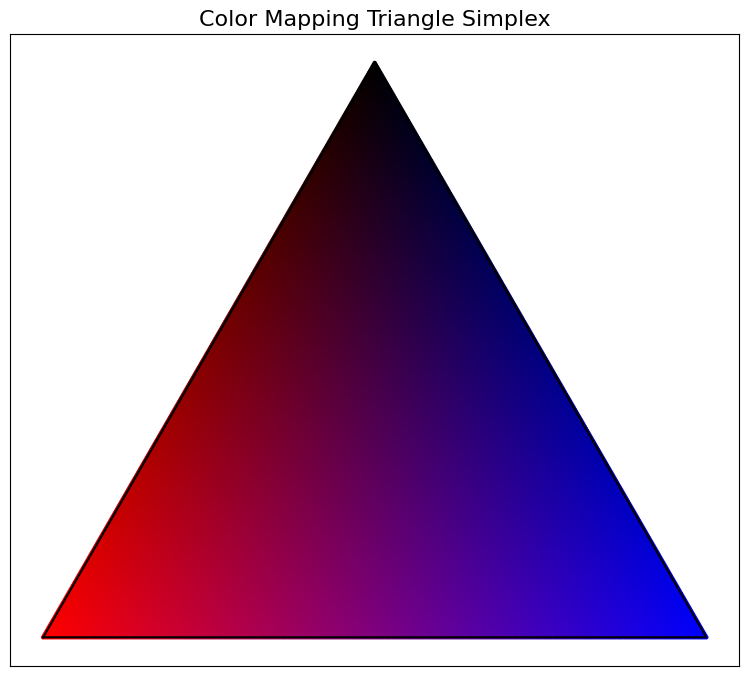

In [114]:


def barycentric_to_cartesian(bary):
    """
    Convert barycentric coordinates (a, b, c) into Cartesian coordinates.
    For an equilateral triangle with vertices:
      A = (0, 0)         (for Disruptive AI, red)
      B = (1, 0)         (for Consolidating AI, blue)
      C = (0.5, sqrt(3)/2) (for General AI, green)
    """
    A = np.array([0, 0])
    B = np.array([1, 0])
    C = np.array([0.5, np.sqrt(3)/2])
    a, b, c = bary
    return a * A + b * B + c * C

# Create a grid of barycentric coordinates (a, b, c) with a + b + c = 1
n = 300
points = []
colors = []
for i in range(n + 1):
    for j in range(n + 1 - i):
        k = n - i - j
        a = i / n
        b = j / n
        c = k / n
        # Only include points that are strictly inside the triangle
        points.append(barycentric_to_cartesian((a, b, c)))
        # Map barycentrics to an RGB color:
        # Here, we assign: red = a (Disruptive AI), blue = b (Consolidating AI), green = c (Baseline General AI)
        colors.append((a, 0, b))

points = np.array(points)
colors = np.array(colors)

# Plot the triangle simplex as a color legend
fig, ax = plt.subplots(figsize=(8, 7))
sc = ax.scatter(points[:, 0], points[:, 1], color=colors, s=5)

# Draw triangle borders
triangle_vertices = np.array([barycentric_to_cartesian((1, 0, 0)),   # Pure Disruptive AI (red)
                              barycentric_to_cartesian((0, 1, 0)),   # Pure Consolidating AI (blue)
                              barycentric_to_cartesian((0, 0, 1)),   # Pure General AI (green)
                              barycentric_to_cartesian((1, 0, 0))])  # Close the triangle
ax.plot(triangle_vertices[:, 0], triangle_vertices[:, 1], 'k-', lw=1.5)

# Annotate the vertices
# ax.text(triangle_vertices[0, 0] - 0.03, triangle_vertices[0, 1] - 0.03, 'Disruptive AI', 
#         fontsize=12, color='red', ha='right', va='top')
# ax.text(triangle_vertices[1, 0] + 0.03, triangle_vertices[1, 1] - 0.03, 'Consolidating AI', 
#         fontsize=12, color='blue', ha='left', va='top')
# ax.text(triangle_vertices[2, 0], triangle_vertices[2, 1] + 0.05, 'General AI', 
#         fontsize=12, color='green', ha='center', va='bottom')

ax.set_title("Color Mapping Triangle Simplex", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.savefig('../results/figures/Industry_field_difference_map.png')
plt.tight_layout()
plt.show()
